In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
new_dir = "/scratch/indikar_root/indikar1/cstansbu/scpc_test/reports/coverage_by_cell/"
old_dir = "/scratch/indikar_root/indikar1/cstansbu/status_quo/reports/samtools_coverage/"

cells = ['b01', 'b11']

res = []

for cell in cells:
    new_path = f"{new_dir}{cell}.GRCm39.samtools.coverage.txt"
    old_path = f"{old_dir}NlaIII_{cell}_GRCm39.txt"

    df1 = pd.read_csv(new_path, sep='\t')
    df1['pipeline'] = 'Pooled'
    
    df2 = pd.read_csv(old_path, sep='\t')
    df2['pipeline'] = 'Digest'

    df = pd.concat([df1, df2])
    df['cell'] = cell
    res.append(df)


df = pd.concat(res)
df.head()

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,pipeline,cell
0,1,1,195154279,159,16046,0.008222,0.000170,18.9,46.0,Pooled,b01
1,2,1,181755017,236,15050,0.008280,0.000271,21.0,32.2,Pooled,b01
2,3,1,159745316,152,19825,0.012410,0.000254,18.7,48.1,Pooled,b01
3,4,1,156860686,155,18408,0.011735,0.000237,19.9,44.8,Pooled,b01
4,5,1,151758149,156,12282,0.008093,0.000165,19.8,45.2,Pooled,b01


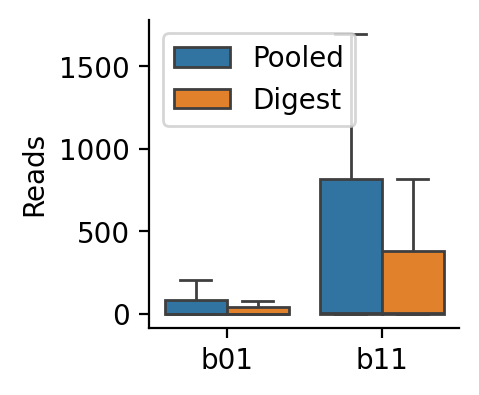

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 2, 2

sns.boxplot(data=df, 
            x='cell',
            y='numreads',
            hue='pipeline',
            showfliers=False)

plt.xlabel("")
plt.ylabel("Reads")
sns.move_legend(plt.gca(), 
                loc='upper left',
                title="")
sns.despine()

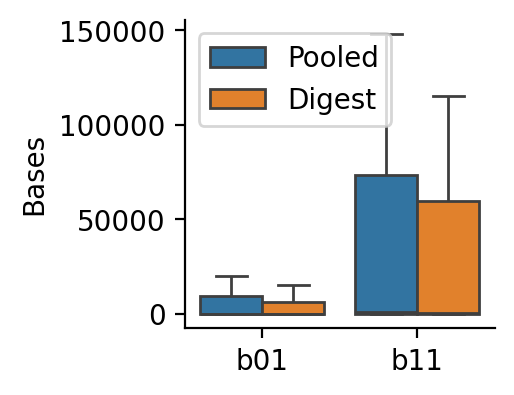

In [4]:
sns.boxplot(data=df, 
            x='cell',
            y='covbases',
            hue='pipeline',
            showfliers=False)

plt.xlabel("")
plt.ylabel("Bases")
sns.move_legend(plt.gca(), 
                loc='upper left',
                title="")
sns.despine()

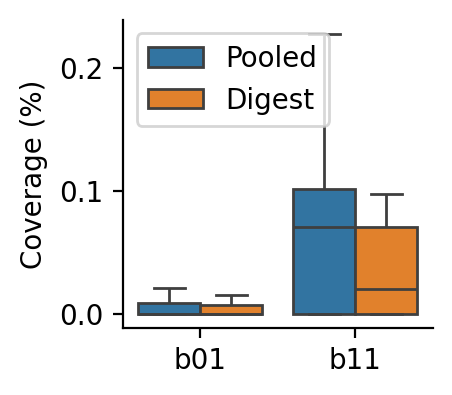

In [5]:
sns.boxplot(data=df, 
            x='cell',
            y='coverage',
            hue='pipeline',
            showfliers=False)

plt.xlabel("")
plt.ylabel("Coverage (%)")
sns.move_legend(plt.gca(), 
                loc='upper left',
                title="")
sns.despine()

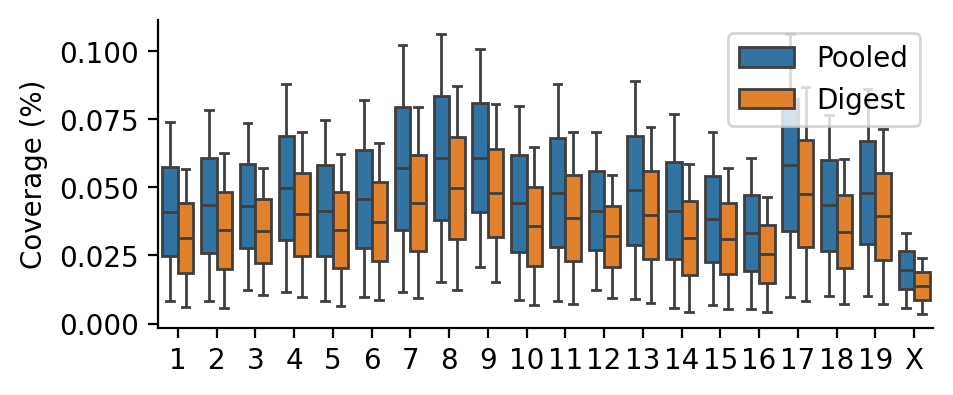

In [6]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 2

chroms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', 'X',]

mask = df['#rname'].isin(chroms)

sns.boxplot(data=df[mask], 
            x='#rname',
            y='coverage',
            hue='pipeline',
            showfliers=False)

plt.xlabel("")
plt.ylabel("Coverage (%)")
sns.move_legend(plt.gca(), 
                loc='best',
                title="")
sns.despine()